In [39]:
import numpy as np
import pandas as pd
import datetime

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/provide_gas/train.csv', encoding='euc-kr')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/provide_gas/test.csv')
holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/provide_gas/holiday_effect.csv', encoding='euc-kr')

In [9]:
holidays.head()

,특수일,추정치
0,근무일,0.999
1,월요일,-0.019
2,토요일,-0.090
3,일요일,-0.150
4,1월 1일,-0.099


In [40]:
test['연월일'] = test['일자|시간|구분'].str[:10]
test['시간'] = pd.to_numeric(test['일자|시간|구분'].str[11:13])
test['구분'] = test['일자|시간|구분'].str[14:15]

test.head()

,일자|시간|구분,연월일,시간,구분
0,2019-01-01 01 A,2019-01-01,1,A
1,2019-01-01 02 A,2019-01-01,2,A
2,2019-01-01 03 A,2019-01-01,3,A
3,2019-01-01 04 A,2019-01-01,4,A
4,2019-01-01 05 A,2019-01-01,5,A


In [41]:
all_data = pd.concat([train, test.drop(['일자|시간|구분'], axis=1)], sort=False)
all_data.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [12]:
na_check = all_data.isna().sum() / len(all_data)
na_check

연월일    0.000000
시간     0.000000
구분     0.000000
공급량    0.039456
dtype: float64

In [42]:
all_data['date'] = pd.to_datetime(all_data['연월일'])

In [43]:
all_data['year'] = all_data['date'].dt.year
all_data['month'] = all_data['date'].dt.month
all_data['day'] = all_data['date'].dt.day
all_data['wDay'] = all_data['date'].dt.weekday
all_data['hour'] = pd.to_numeric(all_data['시간'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_

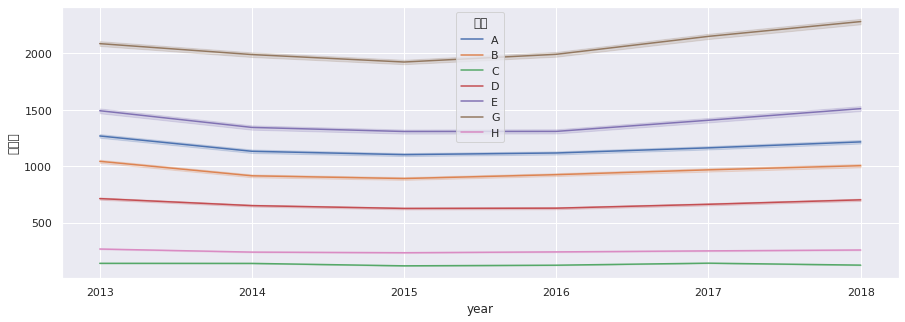

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_

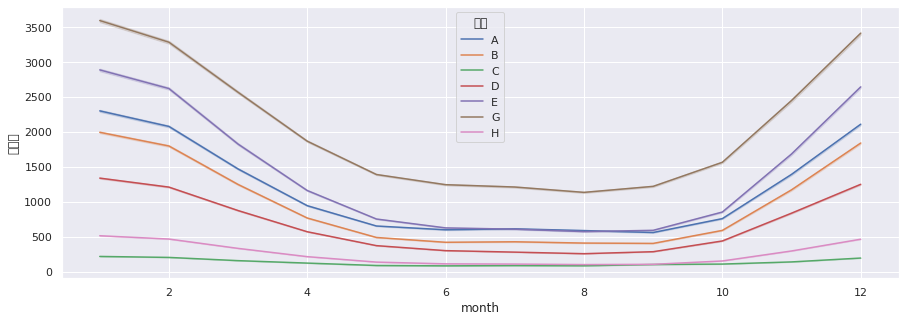

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_

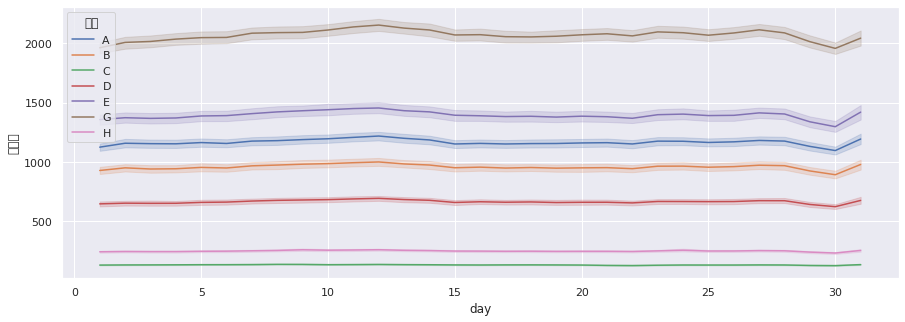

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_

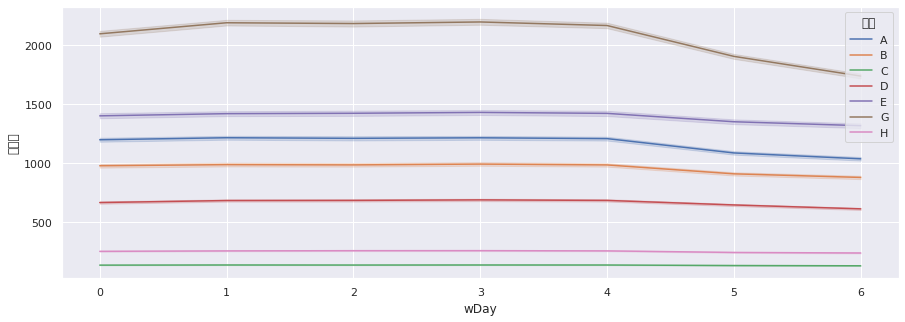

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_

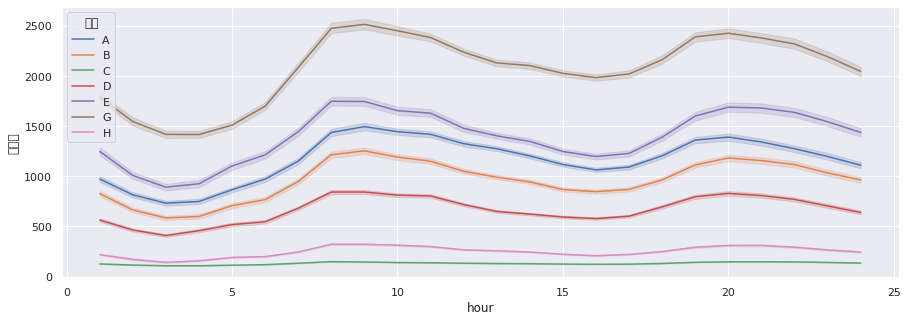

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="darkgrid")

fmri = all_data[all_data['공급량'].notna()]
col = ['year', 'month', 'day', 'wDay', 'hour']

for i in col:
  plt.rc('font', family='고딕')
  plt.figure(figsize=(15, 5))
  sns.lineplot(x=i, y="공급량",
             hue="구분", 
             data=fmri)
  plt.show();

In [114]:
arr = ['month', 'wDay', 'hour', 'day']

for k in arr:
  gb = all_data[all_data['공급량'].notnull()].groupby(k)

  col = all_data[k].unique()
  col2 = all_data['구분'].unique()

  for i in col:
    gb_ = gb.get_group(i)

    for j in col2:
      ave = gb_.loc[gb_['구분'] == j, '공급량'].mean()
      all_data.loc[(all_data[k] == i) & (all_data['구분'] == j), k+'_mean'] = ave

In [102]:
 from korean_lunar_calendar import KoreanLunarCalendar
 calendar = KoreanLunarCalendar()

In [127]:
def calcHolidayEffect(x):
  if x.weekday == 1:
    return -0.019
  elif x.weekday == 5:
    return -0.09
  elif x.weekday == 6:
    return -0.15
  elif x.month == 1 and x.day == 1:
    return -0.099
  elif x.month == 3 and x.day == 1:
    return -0.083
  elif x.month == 5 and x.day == 1:
    return -0.124
  elif x.month == 4 and x.day == 5:
    return -0.058
  elif x.month == 5 and x.day == 5:
    return -0.157
  elif x.month == 6 and x.day == 6:
    return -0.151
  elif x.month == 7 and x.day == 17:
    return -0.158
  elif x.month == 8 and x.day == 15:
    return -0.209
  elif x.month == 10 and x.day == 3:
    return -0.074
  elif x.month == 12 and x.day == 25:
    return -0.086
  elif x.month == 12 and x.day == 31:
    return -0.028

  # 음력 계산
  calendar.setSolarDate(x.year, x.month, x.day)
  x = calendar.LunarIsoFormat()
  month = pd.to_numeric(x[5:7])
  day = pd.to_numeric(x[8:10])
  

  if month == 4 and day == 8:
    return -0.107

  elif month == 12 and day >= 30:
    return -0.041
  elif month == 12 and day >= 31:
    return -0.129
  elif month == 1 and day >= 1:
    return -0.192
  elif month == 1 and day >= 2:
    return -0.131
  elif month == 1 and day >= 3:
    return -0.05
  elif month == 1 and day >= 4:
    return -0.006

  elif month == 8 and day >= 13:
    return -0.151
  elif month == 8 and day >= 14:
    return -0.317
  elif month == 8 and day >= 15:
    return -0.439
  elif month == 8 and day >= 16:
    return -0.382
  elif month == 8 and day >= 17:
    return -0.254
  elif month == 8 and day >= 18:
    return -0.122
  return 0


In [150]:
col = all_data['date'].unique()

for i in col:
  tmp = calcHolidayEffect(pd.to_datetime(i))
  all_data.loc[all_data['date'] == i, 'holiday_effect'] = tmp

In [152]:
all_data['isHoliday'] = all_data['holiday_effect'] != 0

In [153]:
all_data

,연월일,시간,구분,공급량,date,year,month,day,wDay,hour,month_mean,wDay_mean,hour_mean,holiday_effect,month_mean_,wDay_mean_,hour_mean_,day_mean,isHoliday
0,2013-01-01,1,A,2497.129,2013-01-01,2013,1,1,1,1,2298.611019,1215.406035,972.988785,-0.099,0,0,0,1125.170481,True
1,2013-01-01,2,A,2363.265,2013-01-01,2013,1,1,1,2,2298.611019,1215.406035,814.675537,-0.099,0,0,0,1125.170481,True
2,2013-01-01,3,A,2258.505,2013-01-01,2013,1,1,1,3,2298.611019,1215.406035,732.363268,-0.099,0,0,0,1125.170481,True
3,2013-01-01,4,A,2243.969,2013-01-01,2013,1,1,1,4,2298.611019,1215.406035,748.920573,-0.099,0,0,0,1125.170481,True
4,2013-01-01,5,A,2344.105,2013-01-01,2013,1,1,1,5,2298.611019,1215.406035,865.690464,-0.099,0,0,0,1125.170481,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2019-03-31,20,H,NaN,2019-03-31,2019,3,31,6,20,332.351503,235.487526,310.375015,0.000,0,0,0,253.589451,False
15116,2019-03-31,21,H,NaN,2019-03-31,2019,3,31,6,21,332.351503,235.487526,311.013925,0.000,0,0,0,253.589451,False
15117,2019-03-31,22,H,NaN,2019-03-31,2019,3,31,6,22,332.351503,235.487526,293.073042,0.000,0,0,0,253.589451,False
15118,2019-03-31,23,H,NaN,2019-03-31,2019,3,31,6,23,332.351503,235.487526,266.247230,0.000,0,0,0,253.589451,False


In [154]:
all_data.corr()

,시간,공급량,year,month,day,wDay,hour,month_mean,wDay_mean,hour_mean,holiday_effect,month_mean_,wDay_mean_,hour_mean_,day_mean,isHoliday
시간,1.000000e+00,0.099112,0.000000e+00,-3.064387e-21,-4.632757e-18,-5.358725e-21,1.000000e+00,9.736628e-19,-1.697335e-19,1.397601e-01,1.058556e-20,NaN,NaN,NaN,6.472359e-18,-1.791555e-21
공급량,9.911152e-02,1.000000,1.175500e-02,-1.547875e-01,-1.656311e-03,-3.947779e-02,9.911152e-02,9.329587e-01,6.797241e-01,7.091549e-01,-7.904414e-02,NaN,NaN,NaN,6.758002e-01,6.320701e-02
year,0.000000e+00,0.011755,1.000000e+00,-9.514033e-02,-1.430067e-03,1.830602e-03,0.000000e+00,5.159134e-02,-1.265134e-04,1.155651e-15,-4.137807e-02,NaN,NaN,NaN,8.639017e-05,3.604314e-02
month,-3.064387e-21,-0.154787,-9.514033e-02,1.000000e+00,1.148209e-02,5.621060e-04,-3.064387e-21,-1.915959e-01,-2.373601e-04,-2.002963e-16,2.254999e-01,NaN,NaN,NaN,-5.133571e-04,-1.788979e-01
day,-4.632757e-18,-0.001656,-1.430067e-03,1.148209e-02,1.000000e+00,-1.524581e-03,-4.632757e-18,-5.914864e-03,2.182142e-04,3.971913e-17,5.563781e-02,NaN,NaN,NaN,-2.374268e-03,-6.552431e-02
wDay,-5.358725e-21,-0.039478,1.830602e-03,5.621060e-04,-1.524581e-03,1.000000e+00,-5.358725e-21,-3.078799e-04,-5.810807e-02,-2.030897e-18,1.555269e-02,NaN,NaN,NaN,-4.720471e-05,-1.848007e-02
hour,1.000000e+00,0.099112,0.000000e+00,-3.064387e-21,-4.632757e-18,-5.358725e-21,1.000000e+00,9.736628e-19,-1.697335e-19,1.397601e-01,1.058556e-20,NaN,NaN,NaN,6.472359e-18,-1.791555e-21
month_mean,9.736628e-19,0.932959,5.159134e-02,-1.915959e-01,-5.914864e-03,-3.078799e-04,9.736628e-19,1.000000e+00,7.221717e-01,6.921442e-01,-1.085544e-01,NaN,NaN,NaN,7.267621e-01,9.298171e-02
wDay_mean,-1.697335e-19,0.679724,-1.265134e-04,-2.373601e-04,2.182142e-04,-5.810807e-02,-1.697335e-19,7.221717e-01,1.000000e+00,9.460070e-01,-9.802704e-04,NaN,NaN,NaN,9.927114e-01,1.433237e-03
hour_mean,1.397601e-01,0.709155,1.155651e-15,-2.002963e-16,3.971913e-17,-2.030897e-18,1.397601e-01,6.921442e-01,9.460070e-01,1.000000e+00,-2.196854e-16,NaN,NaN,NaN,9.515045e-01,3.323933e-16


In [ ]:
all_data.describe()

,시간,공급량,year,month,day,wDay,month_mean,wDay_mean,hour,hour_mean,year_mean,day_mean,month_mean_
count,383208.000000,368088.000000,383208.000000,383208.000000,383208.000000,383208.000000,3.832080e+05,3.832080e+05,383208.000000,3.832080e+05,368088.000000,383208.000000,383208.0
mean,12.500000,948.100037,2015.638317,6.345463,15.718983,3.001315,-1.754368e-14,-1.969115e-13,12.500000,-2.900801e-13,948.100037,948.131163,0.0
std,6.922196,927.211578,1.806830,3.496466,8.795482,1.999454,2.509769e-01,3.040034e-01,6.922196,2.733741e-01,629.381330,626.625828,0.0
min,1.000000,1.378000,2013.000000,1.000000,1.000000,0.000000,-2.537472e-01,-3.962482e-01,1.000000,-3.490319e-01,118.356082,125.537033,0.0
25%,6.750000,221.973000,2014.000000,3.000000,8.000000,1.000000,-1.959939e-01,-3.343080e-01,6.750000,-2.704083e-01,258.759915,252.506884,0.0
50%,12.500000,637.014000,2016.000000,6.000000,16.000000,3.000000,-1.041740e-01,1.741109e-02,12.500000,-3.312877e-02,925.891189,955.965955,0.0
75%,18.250000,1398.919000,2017.000000,9.000000,23.000000,5.000000,1.185940e-01,1.945088e-01,18.250000,1.837098e-01,1309.097887,1378.983047,0.0
max,24.000000,11593.617000,2019.000000,12.000000,31.000000,6.000000,7.462528e-01,6.037518e-01,24.000000,6.509681e-01,2281.841916,2155.546097,0.0


In [ ]:
all_data.columns

Index(['연월일', '시간', '구분', '공급량', 'date', 'year', 'month', 'day', 'wDay',
       'month_mean', 'wDay_mean', 'hour', 'hour_mean', 'year_mean', 'day_mean',
       'month_mean_'],
      dtype='object')

In [156]:
nTrain = len(train)
train = all_data[:nTrain]
test = all_data[nTrain:]

In [157]:
x_col = ['month_mean', 'wDay_mean', 'hour_mean', 'isHoliday']
y_col = '공급량'

x_train = train[x_col]
y_train = train[y_col]

x_test = test[x_col]

In [79]:
x_train.count()

month_mean    368088
wDay_mean     368088
hour_mean     368088
dtype: int64

In [158]:
from sklearn.model_selection import train_test_split

train_x = train[x_col]
train_y = np.log1p(train[y_col])

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)

test_id_idx = test.index

test_x = test[x_col]

In [159]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


model_ = XGBRegressor(random_state=42)
#model_ = GradientBoostingRegressor(random_state=42)

model_.fit(train_x, train_y)

[08:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


pred_train = model_.predict(train_x)
pred_val = model_.predict(val_x)


print('train mae score: ', mean_absolute_error(train_y, pred_train))
print('val mae score:', mean_absolute_error(val_y, pred_val))
# train mae score:  0.2177117931811541
# val mae score: 0.2174483456644806
# real score: 0.1149508172


train mae score:  0.21683900419742286
val mae score: 0.21839257011636848


In [161]:
def nmae(true_df, pred_df):
    target_idx = true_df.iloc[:,0]
    pred_df = pred_df[pred_df.iloc[:,0].isin(target_idx)]
    pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True])
    true_df = true_df.sort_values(by=[true_df.columns[0]], ascending=[True])
    
    true = true_df.iloc[:,1].to_numpy()
    pred = pred_df.iloc[:,1].to_numpy()
    
    score = np.mean((np.abs(true-pred))/true)
    
    return score

In [162]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/provide_gas/sample_submission.csv")

In [163]:
model_.fit(train_x, train_y)
pred = model_.predict(x_test)

submission[y_col] = np.expm1(pred)

[08:57:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [166]:
submission.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,1763.505567
1,2019-01-01 02 A,1583.519818
2,2019-01-01 03 A,1365.259387
3,2019-01-01 04 A,1365.259387
4,2019-01-01 05 A,1583.519818


In [165]:
submission['date'] = pd.to_datetime(submission['일자|시간|구분'].str[:10])
col = submission['date'].unique()

for i in col:
  tmp = calcHolidayEffect(pd.to_datetime(i))
  submission.loc[submission['date'] == i, 'holiday_effect'] = tmp
submission['공급량'] = submission['공급량'] + (submission['공급량'] * submission['holiday_effect'])
submission = submission.drop(['date', 'holiday_effect'], axis=1)

In [167]:
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/provide_gas/submission.csv", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
